In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv('car_prices.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [5]:
df.replace("", np.nan, inplace=True)  # Replace empty strings with NaN
df.replace(" ", np.nan, inplace=True) # Replace spaces with NaN

In [6]:
df_cleaned = df.dropna()
df=df_cleaned 

In [10]:
df['saledate'] = pd.to_datetime(df['saledate'], format='%Y-%m-%d', utc=True)


In [11]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [12]:
car_data=df

In [13]:
# List of categorical columns to analyze
categorical_columns = [
    'year', 'make',  'body', 'transmission', 'vin',
    'state', 'color', 'interior', 'seller'
]

# Display unique categories for each column
for column in categorical_columns:
    unique_values = car_data[column].unique()
    print(f"Unique categories in '{column}':")
    print(unique_values)
    print("-" * 50)

Unique categories in 'year':
[2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1996 1995 1997 1994 1993 1992 1991 1990]
--------------------------------------------------
Unique categories in 'make':
['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Cadillac' 'Acura'
 'Lexus' 'Hyundai' 'Buick' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'Porsche' 'Dodge' 'FIAT' 'Chrysler' 'Ferrari' 'Honda'
 'GMC' 'Ram' 'smart' 'Bentley' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'Saab' 'Suzuki' 'Oldsmobile' 'Rolls-Royce' 'Isuzu' 'Plymouth'
 'Tesla' 'Aston Martin' 'Geo' 'Fisker' 'Daewoo' 'Lamborghini' 'Lotus']
--------------------------------------------------
Unique categories in 'body':
['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' 'Van'
 'Double Cab' 'CrewMax Cab' 'Access 

# Price Analysis
   

###  Factors impacting selling price

In [14]:
# Select relevant numeric features
numeric_features = car_data[['year', 'condition', 'odometer', 'mmr', 'sellingprice']]

# Correlation matrix
correlation_matrix = numeric_features.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  year  condition  odometer       mmr  sellingprice
year          1.000000   0.334760 -0.773102  0.588614      0.578933
condition     0.334760   1.000000 -0.314205  0.276521      0.317712
odometer     -0.773102  -0.314205  1.000000 -0.582654     -0.577397
mmr           0.588614   0.276521 -0.582654  1.000000      0.983493
sellingprice  0.578933   0.317712 -0.577397  0.983493      1.000000


####  Average Selling Price for each Make and Model

In [15]:

# Grouping by make and model to calculate average selling price, average condition, and average odometer
make_model_avg_price = car_data.groupby(['make', 'model']).agg({
    'sellingprice': 'mean',
    'condition': 'mean',
    'odometer': 'mean'
}).reset_index()

print("Average Selling Price for each Make and Model:")
print(make_model_avg_price)


Average Selling Price for each Make and Model:
      make    model  sellingprice  condition       odometer
0    Acura       CL   1921.839080  19.080460  160446.057471
1    Acura      ILX  18910.679612  36.563107   25836.446602
2    Acura  Integra   1205.000000  10.850000  182504.550000
3    Acura   Legend    660.714286   1.571429  198084.857143
4    Acura      MDX  15876.112460  30.386731   99711.872977
..     ...      ...           ...        ...            ...
771  Volvo       XC   1952.631579  25.263158  149033.736842
772  Volvo     XC60  24090.342679  38.595016   36762.043614
773  Volvo     XC70  14789.130435  35.052174   80322.800000
774  Volvo     XC90   8816.472546  29.718802  104229.346090
775  smart   fortwo   6301.603499  37.897959   29006.107872

[776 rows x 5 columns]


In [16]:
#Top 10 models 
s = make_model_avg_price.sort_values(['sellingprice'], ascending=False)
s.head(10)

,make,model,sellingprice,condition,odometer
223,Ferrari,458 Italia,183000.000000,46.000000,12116.000000
549,Mercedes-Benz,SLS AMG GT,156500.000000,43.000000,15019.000000
74,BMW,i8,154222.222222,22.888889,1056.111111
655,Rolls-Royce,Ghost,153456.250000,37.000000,13448.375000
224,Ferrari,California,131846.153846,37.461538,14345.846154
548,Mercedes-Benz,SLS AMG,116016.666667,24.333333,12369.000000
422,Lamborghini,Gallardo,111500.000000,43.666667,15785.333333
80,Bentley,Continental GTC Speed,111000.000000,45.000000,38620.000000
225,Ferrari,F430,106250.000000,27.500000,25476.000000
76,Bentley,Continental Flying Spur Speed,105750.000000,41.000000,10541.000000


#### Compare Selling Price with MMR Value


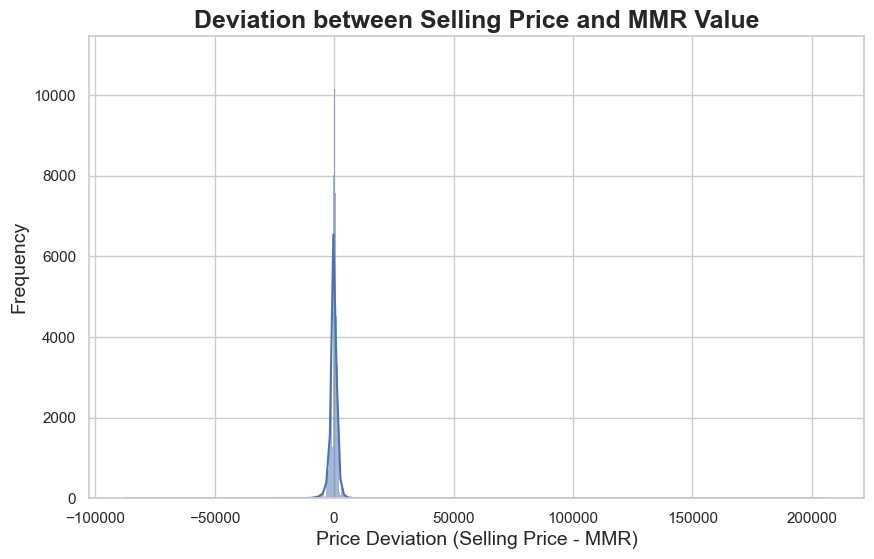

In [34]:
#Compare Selling Price with MMR Value

# Calculate deviation between selling price and MMR value
car_data['price_deviation'] = car_data['sellingprice'] - car_data['mmr']

# Plotting the deviation
plt.figure(figsize=(10, 6))
sns.histplot(car_data['price_deviation'], kde=True)
plt.title('Deviation between Selling Price and MMR Value', fontsize=18, weight='bold')
plt.xlabel('Price Deviation (Selling Price - MMR)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

 #### Building a Linear Regression Model

In [18]:

# Dropping rows with missing values
car_data_cleaned = car_data.dropna(subset=['year', 'condition', 'odometer', 'mmr', 'sellingprice'])

# Defining the feature variables (X) and the target variable (y)
X_cleaned = car_data_cleaned[['year', 'condition', 'odometer', 'mmr']]
y_cleaned = car_data_cleaned['sellingprice']

# Splitting the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predicting selling prices on the test set
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Evaluating the model
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)

print("Linear Regression Model Coefficients:")
print(pd.DataFrame(model_cleaned.coef_, X_cleaned.columns, columns=['Coefficient']))
print(f"R^2 Score: {r2_cleaned}")
print(f"Mean Squared Error: {mse_cleaned}")

Linear Regression Model Coefficients:
           Coefficient
year        -42.926093
condition    37.565245
odometer     -0.001066
mmr           0.984061
R^2 Score: 0.9710223249491008
Mean Squared Error: 2633779.7713868287


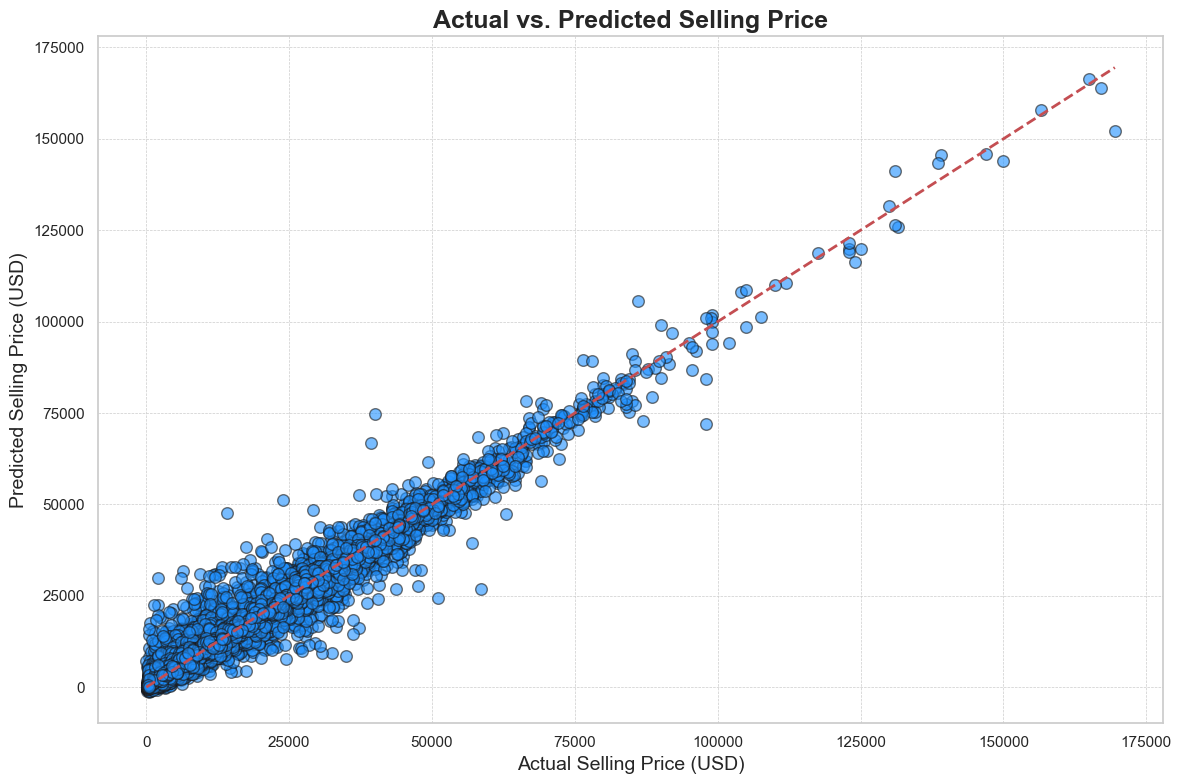

In [35]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot with enhanced visualization
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.6, color='dodgerblue', edgecolor='k', s=70)

# Line representing the perfect prediction (y = x)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'r--', lw=2)

# Adding titles and labels with enhanced styling
plt.xlabel('Actual Selling Price (USD)', fontsize=14)
plt.ylabel('Predicted Selling Price (USD)', fontsize=14)
plt.title('Actual vs. Predicted Selling Price', fontsize=18, weight='bold')

# Adding grid and adjusting layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()

# Odometer Impact

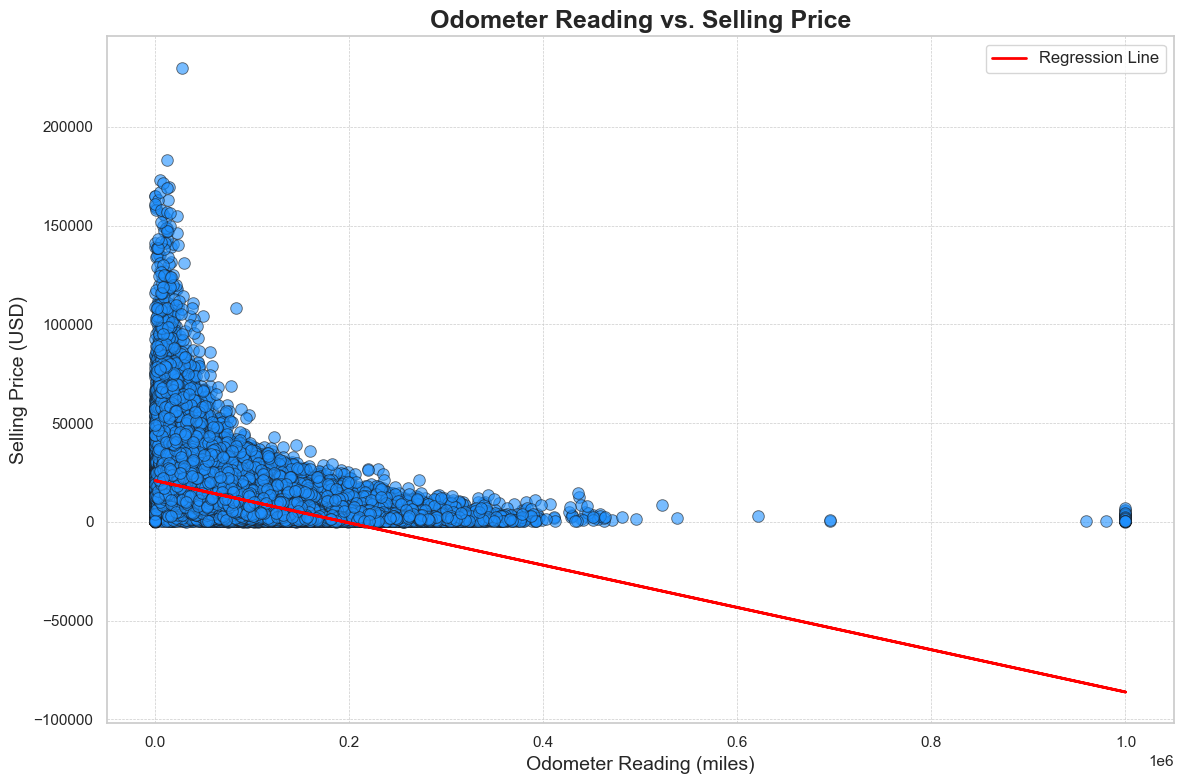

Linear Regression Model Coefficient (Impact of Odometer on Price): -0.10704422907684193
R^2 Score: 0.3356777870212565
Mean Squared Error: 60380220.39908442


In [36]:
# Dropping rows with missing values for odometer and selling price
car_data_cleaned = car_data.dropna(subset=['odometer', 'sellingprice'])

# Scatter Plot: Odometer Reading vs. Selling Price
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the scatter plot
sns.scatterplot(x='odometer', y='sellingprice', data=car_data_cleaned, 
                color='dodgerblue', edgecolor='k', s=70, alpha=0.6)

plt.title('Odometer Reading vs. Selling Price', fontsize=18, weight='bold')
plt.xlabel('Odometer Reading (miles)', fontsize=14)
plt.ylabel('Selling Price (USD)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Building the simple linear regression model
X = car_data_cleaned[['odometer']]
y = car_data_cleaned['sellingprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting selling prices on the test set
y_pred = model.predict(X_test)

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Adding legend to the plot
plt.legend(fontsize=12)

# Displaying the plot
plt.tight_layout()
plt.show()

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Linear Regression Model Coefficient (Impact of Odometer on Price): {model.coef_[0]}")
print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


# Sales Trends

#### Seasonal Patterns in Car Sales Prices

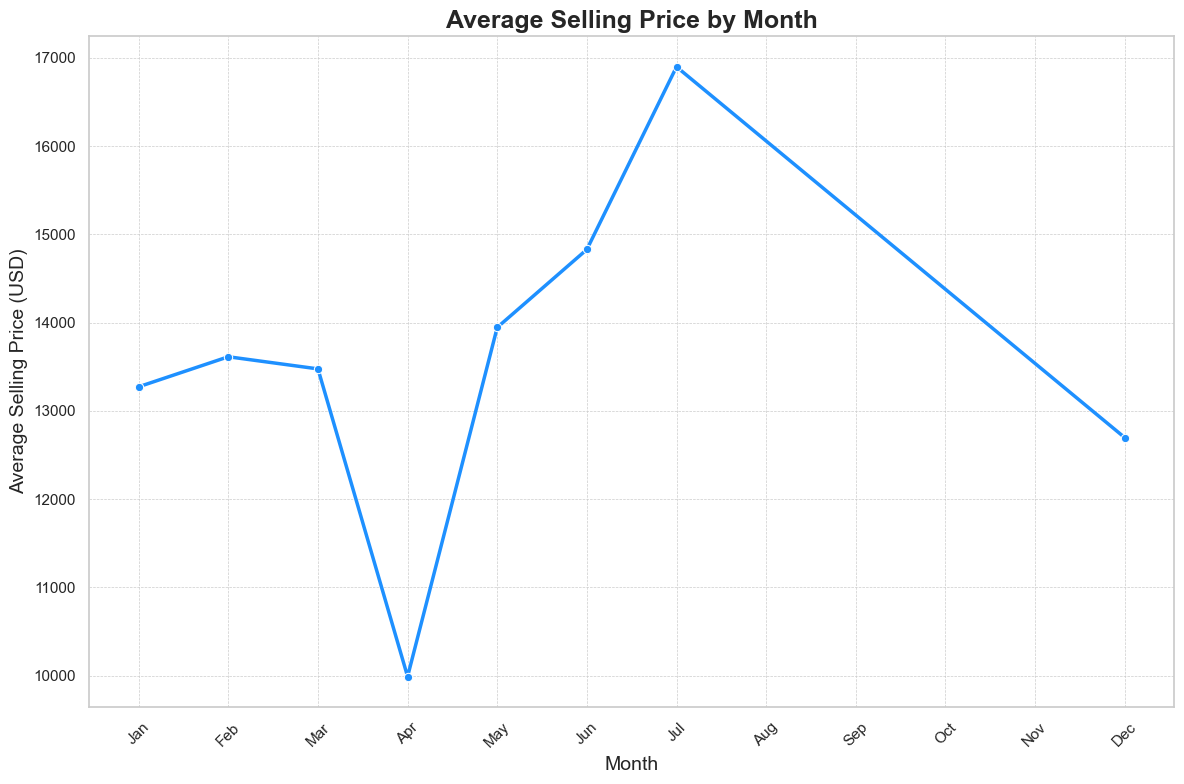

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the sale_date column is in datetime format
car_data['saledate'] = pd.to_datetime(car_data['saledate'])

# Extract month and year from the sale_date for seasonal analysis
car_data['month'] = car_data['saledate'].dt.month
car_data['year'] = car_data['saledate'].dt.year

# Grouping by month to find the average selling price for each month
monthly_price_trend = car_data.groupby('month')['sellingprice'].mean().reset_index()

# Plotting the seasonal trend in selling prices
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Customizing the line plot
sns.lineplot(data=monthly_price_trend, x='month', y='sellingprice', 
             marker='o', color='dodgerblue', linewidth=2.5)

# Setting the title and labels with improved fonts
plt.title('Average Selling Price by Month', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Selling Price (USD)', fontsize=14)

# Replace month numbers with names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)

# Add a grid with less emphasis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Ensure tight layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()


#### Frequency of Sales by Make and Model

Top 10 Make and Model Combinations with Highest Sales:
          make     model  sales_count
585     Nissan    Altima        16346
262       Ford    Fusion        12116
249       Ford     F-150        11950
706     Toyota     Camry        10986
240       Ford    Escape        10656
258       Ford     Focus         9547
312      Honda    Accord         8528
142  Chevrolet    Impala         7500
45         BMW  3 Series         7132
317      Honda     Civic         7068


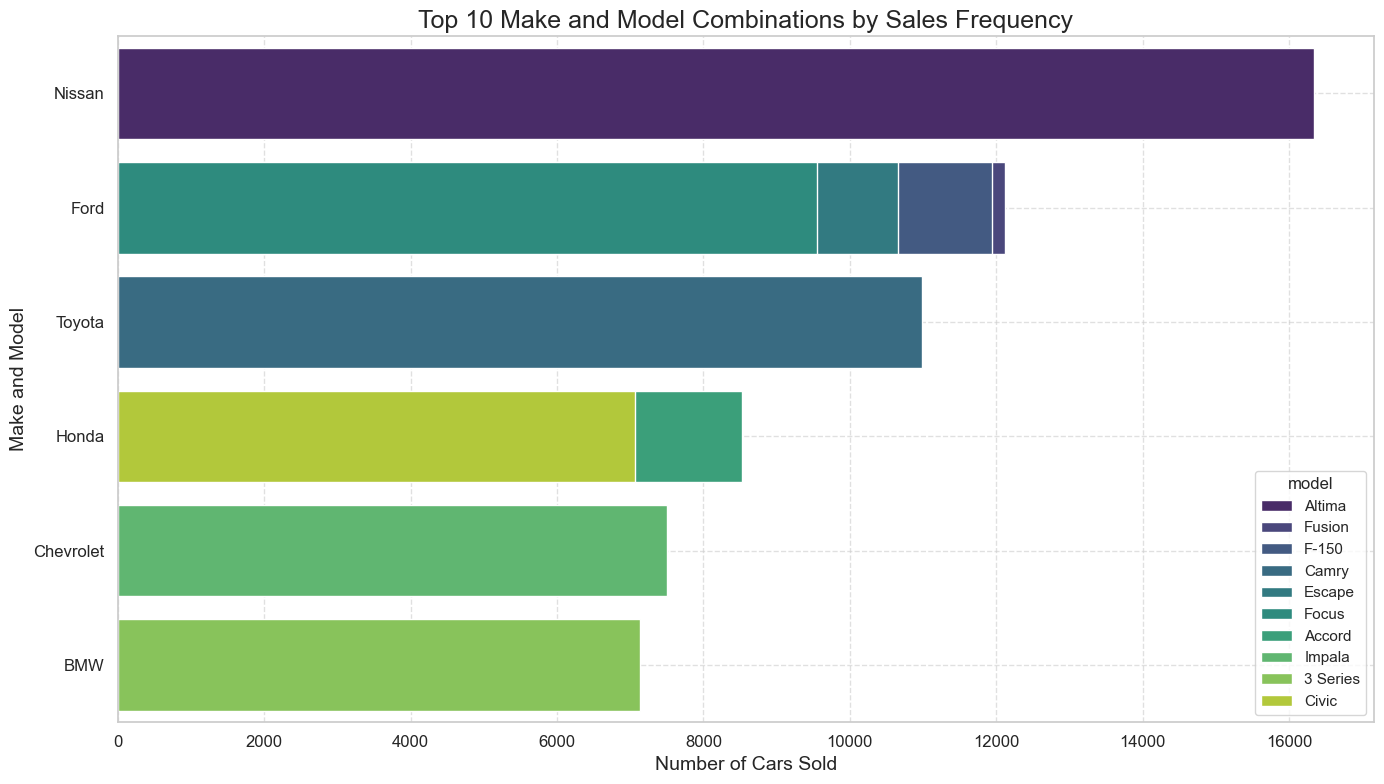

In [38]:
# Grouping by make and model to count the number of sales
sales_frequency = car_data.groupby(['make', 'model']).size().reset_index(name='sales_count')

# Display the top 10 make and model combinations with the highest sales
top_sales_frequency = sales_frequency.sort_values(by='sales_count', ascending=False).head(10)

print("Top 10 Make and Model Combinations with Highest Sales:")
print(top_sales_frequency)

# Enhancing the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Using a specific color palette for clarity
palette = sns.color_palette("viridis", len(top_sales_frequency))

sns.barplot(data=top_sales_frequency, x='sales_count', y='make', hue='model', dodge=False, palette=palette)

plt.title('Top 10 Make and Model Combinations by Sales Frequency', fontsize=18)
plt.xlabel('Number of Cars Sold', fontsize=14)
plt.ylabel('Make and Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding subtle grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Ensuring a clean layout
plt.tight_layout()

plt.show()

# Condition Analysis

#### Impact of Condition on Selling Price

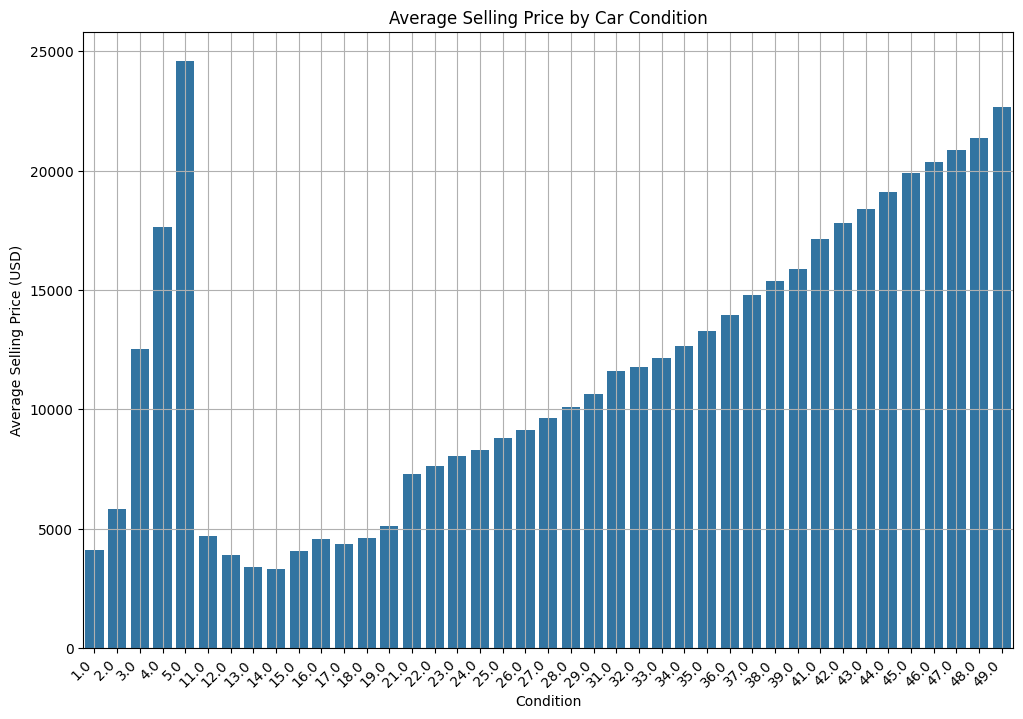

In [23]:
# Dropping rows with missing values for condition, MMR, or selling price
car_data_cleaned = car_data.dropna(subset=['condition', 'mmr', 'sellingprice'])

# Grouping by condition to find the average selling price for each condition
condition_price_trend = car_data_cleaned.groupby('condition')['sellingprice'].mean().reset_index()

# Plotting the impact of condition on selling price with improved x-ticks
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
sns.barplot(data=condition_price_trend, x='condition', y='sellingprice')
plt.title('Average Selling Price by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Average Selling Price (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks and align them to the right
plt.grid(True)
plt.show()


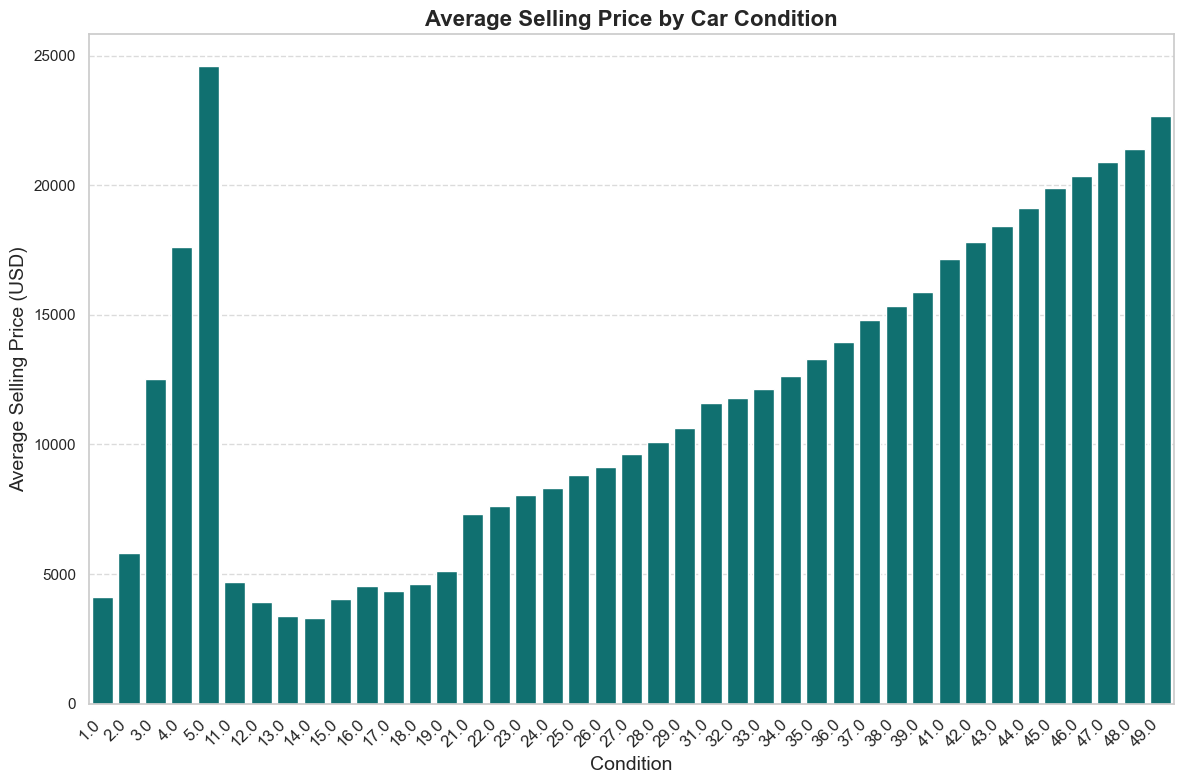

In [40]:

# Dropping rows with missing values for condition, MMR, or selling price
car_data_cleaned = car_data.dropna(subset=['condition', 'mmr', 'sellingprice'])

# Grouping by condition to find the average selling price for each condition
condition_price_trend = car_data_cleaned.groupby('condition')['sellingprice'].mean().reset_index()

# Plotting the impact of condition on selling price with improved aesthetics
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability

# Using Seaborn's barplot with color instead of palette
sns.barplot(data=condition_price_trend, x='condition', y='sellingprice', color='teal')

# Adding titles and labels
plt.title('Average Selling Price by Car Condition', fontsize=16, fontweight='bold')
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Average Selling Price (USD)', fontsize=14)

# Customizing x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding a grid for better readability of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#### Correlation between Condition, MMR Value, and Selling Price

Correlation Matrix:
                   condition_numeric       mmr  sellingprice
condition_numeric           1.000000  0.299832      0.342503
mmr                         0.299832  1.000000      0.983493
sellingprice                0.342503  0.983493      1.000000


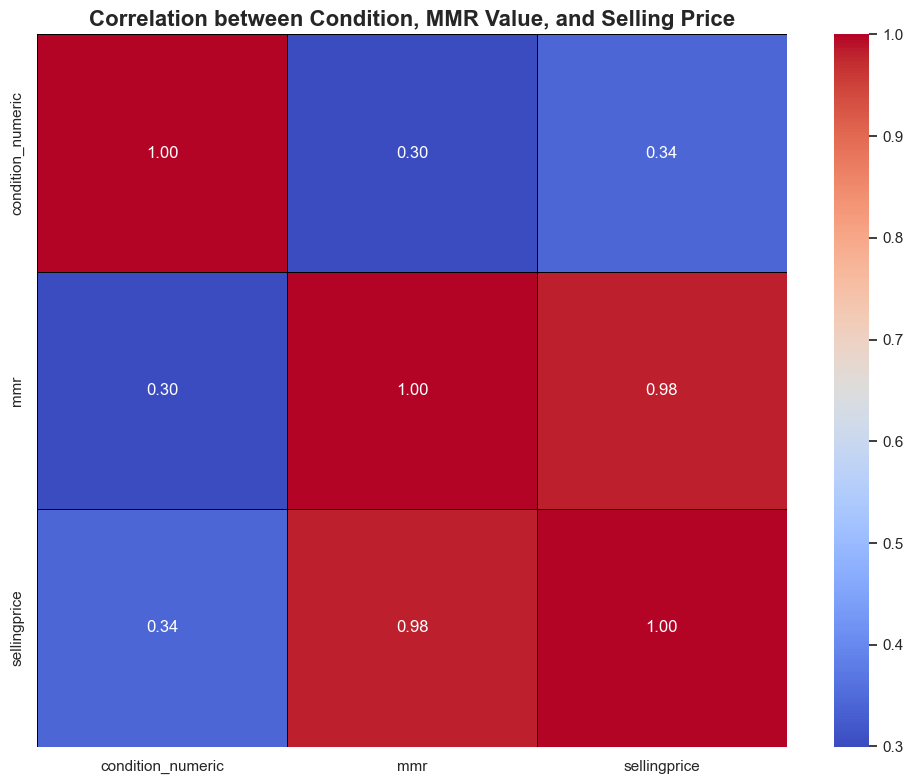

In [41]:
# Converting condition to a numeric format (if not already numeric)
# Assuming condition is categorical and not numeric, we'll convert it to numeric
car_data_cleaned['condition_numeric'] = car_data_cleaned['condition'].astype('category').cat.codes

# Correlation matrix for condition, MMR, and selling price
correlation_matrix = car_data_cleaned[['condition_numeric', 'mmr', 'sellingprice']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for better visualization of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

# Adding titles and labels
plt.title('Correlation between Condition, MMR Value, and Selling Price', fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# State-wise Analysis

#### Analyze Car Prices Across Different States

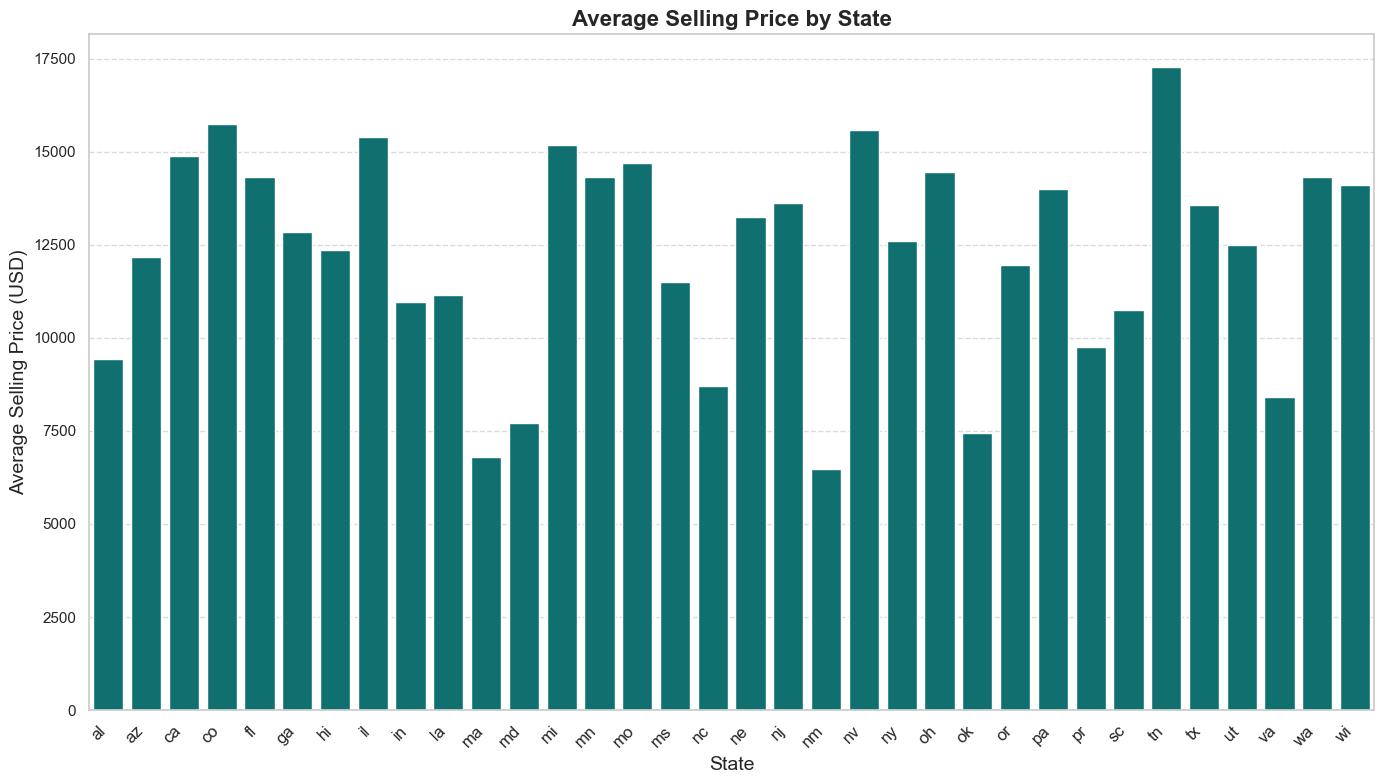

In [43]:
# Dropping rows with missing values for state or selling price
car_data_cleaned = car_data.dropna(subset=['state', 'sellingprice'])

# Grouping by state to find the average selling price for each state
state_price_trend = car_data_cleaned.groupby('state')['sellingprice'].mean().reset_index()

# Plotting the average selling prices across states with improved aesthetics
plt.figure(figsize=(14, 8))  # Adjusted figure size for better readability

# Using Seaborn's barplot with a single color
sns.barplot(data=state_price_trend, x='state', y='sellingprice', color='teal')

# Adding titles and labels
plt.title('Average Selling Price by State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Selling Price (USD)', fontsize=14)

# Customizing x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding a grid for better readability of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### Examine Price Variation by Location

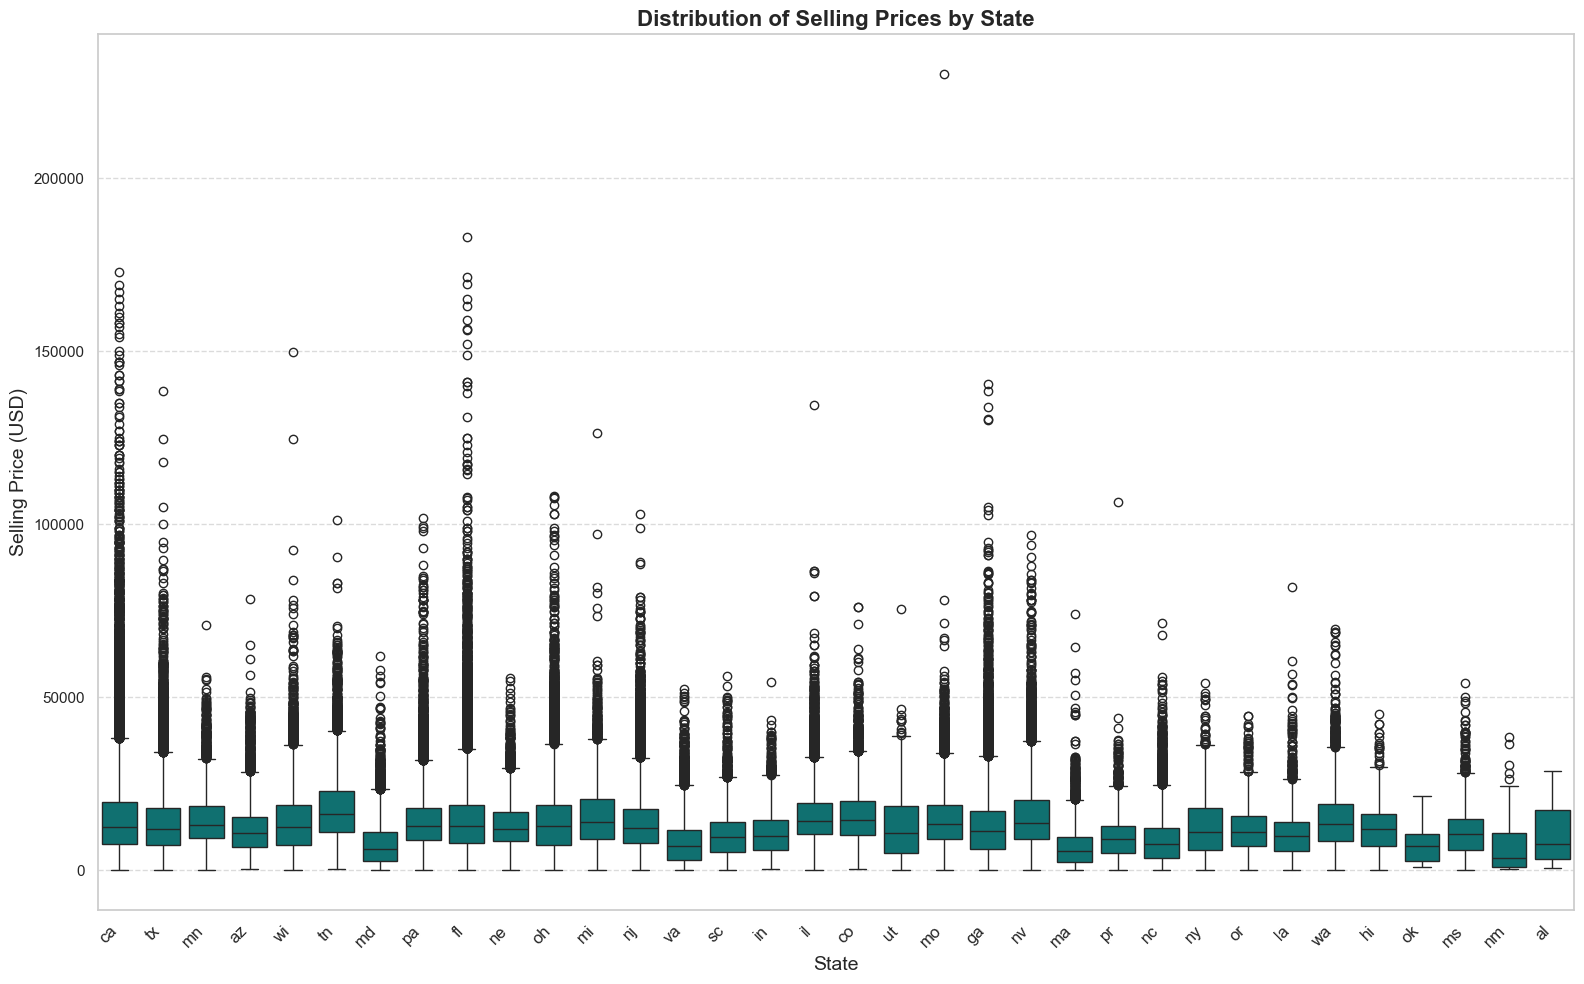

In [47]:
# We can also create a boxplot to see the distribution of selling prices within each state
plt.figure(figsize=(16, 10))  # Adjusted figure size for better readability

# Creating a boxplot with improved aesthetics
sns.boxplot(data=car_data_cleaned, x='state', y='sellingprice', color='teal')

# Adding titles and labels
plt.title('Distribution of Selling Prices by State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Selling Price (USD)', fontsize=14)

# Customizing x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adding a grid for better readability of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Seller Impact

#### Seller Impact on Selling Price

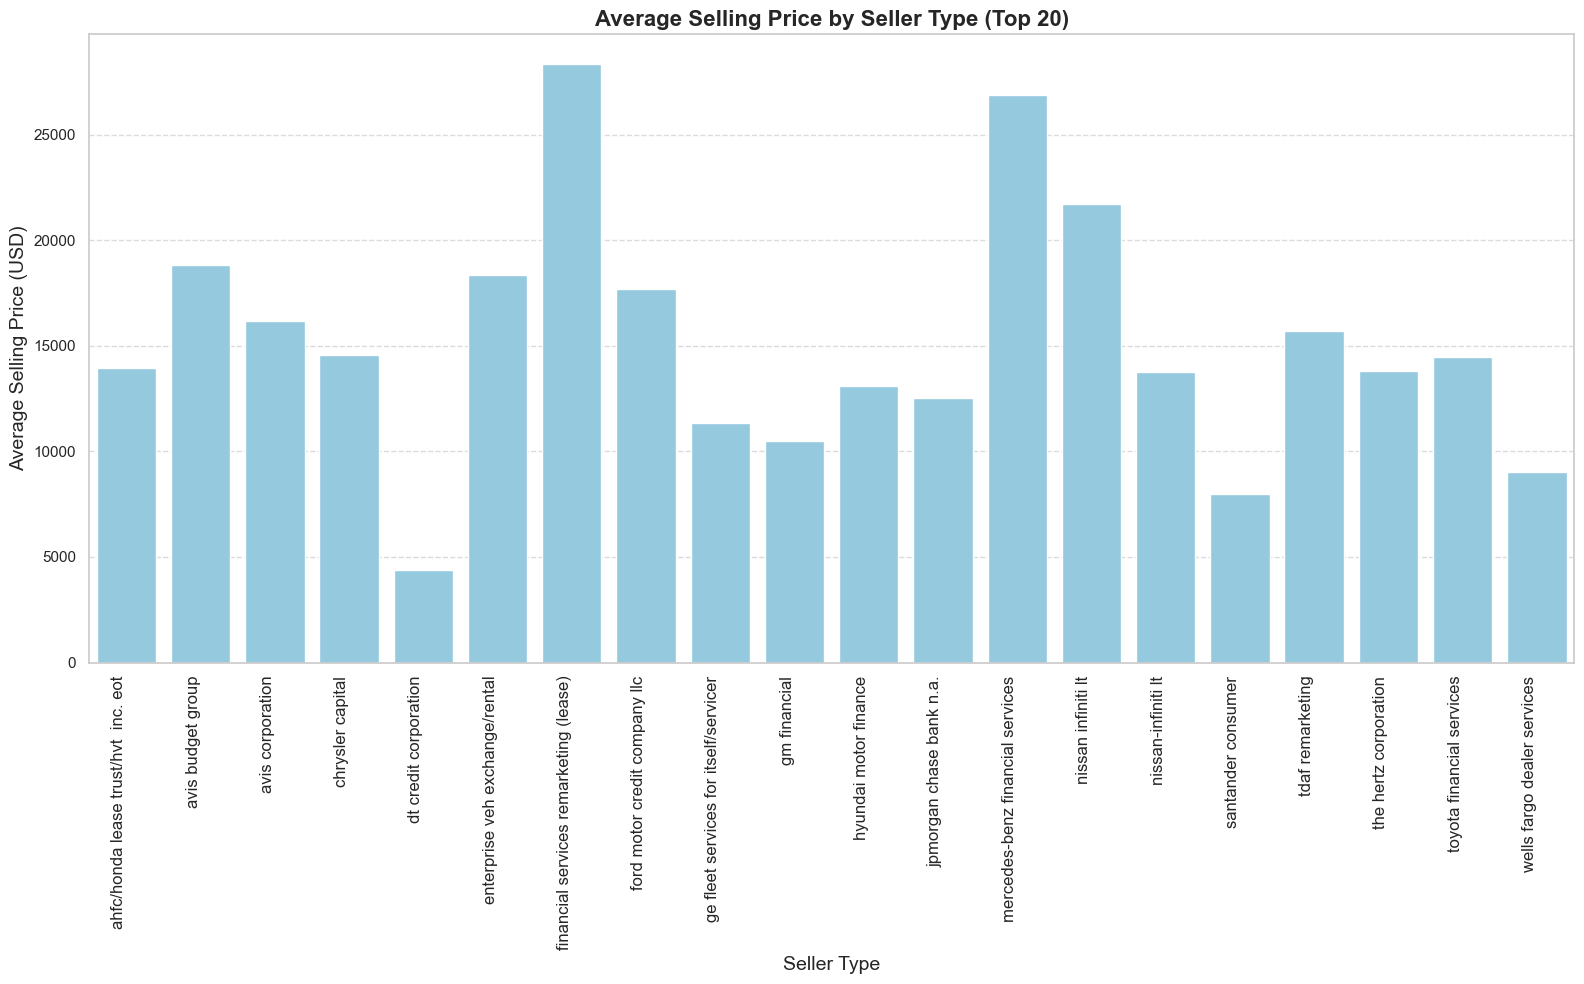

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dropping rows with missing values for seller, year, or selling price
car_data_cleaned = car_data.dropna(subset=['seller', 'year', 'sellingprice'])

# Option 1: Filter by the top 20 most frequent sellers
top_sellers = car_data_cleaned['seller'].value_counts().nlargest(20).index
filtered_data = car_data_cleaned[car_data_cleaned['seller'].isin(top_sellers)]

# Grouping by seller type to find the average selling price for each seller type
seller_price_trend = filtered_data.groupby('seller')['sellingprice'].mean().reset_index()

# Plotting the impact of seller type on selling price with improved aesthetics
plt.figure(figsize=(16, 10))  # Increased figure size for better readability

# Creating a barplot with improved aesthetics
sns.barplot(data=seller_price_trend, x='seller', y='sellingprice',color='skyblue')

# Adding titles and labels
plt.title('Average Selling Price by Seller Type (Top 20)', fontsize=16, fontweight='bold')
plt.xlabel('Seller Type', fontsize=14)
plt.ylabel('Average Selling Price (USD)', fontsize=14)

# Customizing x-ticks for better readability
plt.xticks(rotation=90, ha='right', fontsize=12)

# Adding a grid for better readability of the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#Car Age and Price

#### Car Age and Price Depreciation

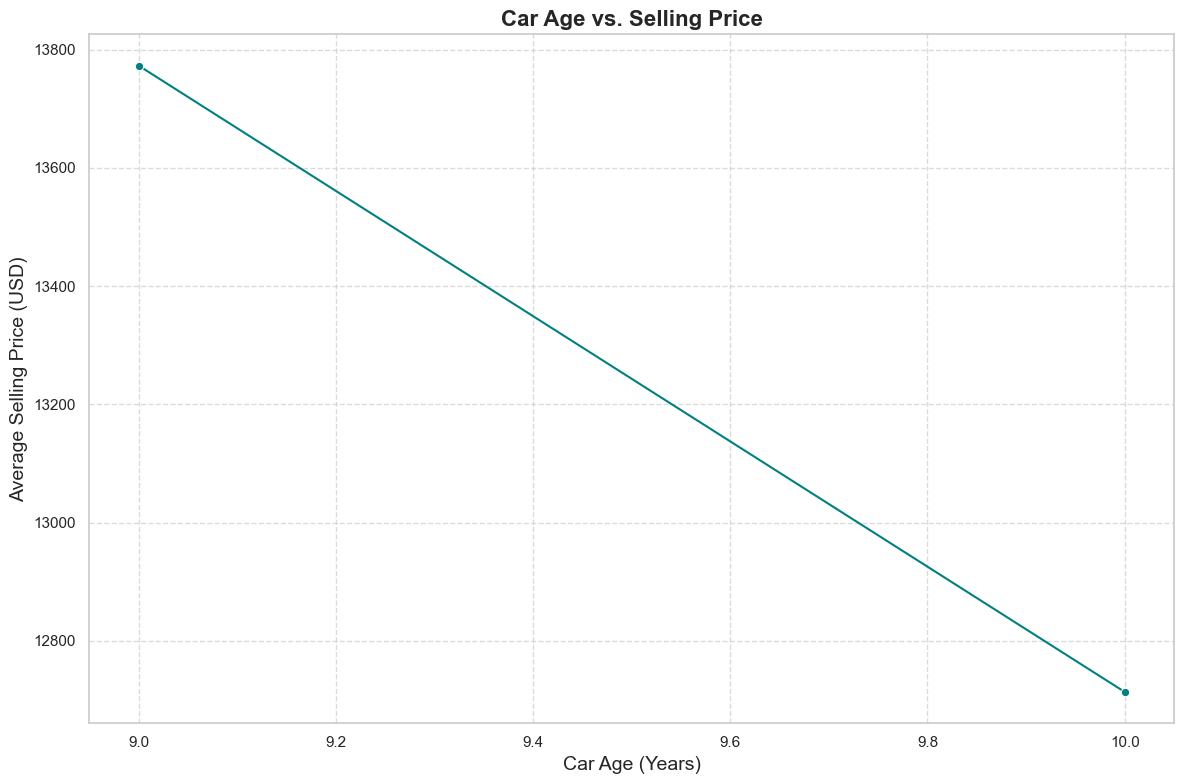

In [53]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Calculate the age of the car
car_data_cleaned['car_age'] = current_year - car_data_cleaned['year']

# Grouping by car age to find the average selling price for each age
age_price_trend = car_data_cleaned.groupby('car_age')['sellingprice'].mean().reset_index()

# Plotting the relationship between car age and selling price with improved aesthetics
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability

# Creating a lineplot with markers
sns.lineplot(data=age_price_trend, x='car_age', y='sellingprice', marker='o', color='teal')

# Adding titles and labels
plt.title('Car Age vs. Selling Price', fontsize=16, fontweight='bold')
plt.xlabel('Car Age (Years)', fontsize=14)
plt.ylabel('Average Selling Price (USD)', fontsize=14)

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Highest and Lowest

#### Year that sold highest number of cars and lowest

In [56]:
# Group by year and count the number of sales for each year
sales_by_year = car_data_cleaned.groupby('year').size().reset_index(name='number_of_sales')

# Find the year with the highest number of sales
max_sales_year = sales_by_year.loc[sales_by_year['number_of_sales'].idxmax()]

print(f"The year with the highest number of sales is {max_sales_year['year']} with {max_sales_year['number_of_sales']} sales.")


The year with the highest number of sales is 2015 with 435536 sales.
